In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
import seaborn as sns

In [9]:

iris = sns.load_dataset('iris')


In [ ]:

print(iris.head(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


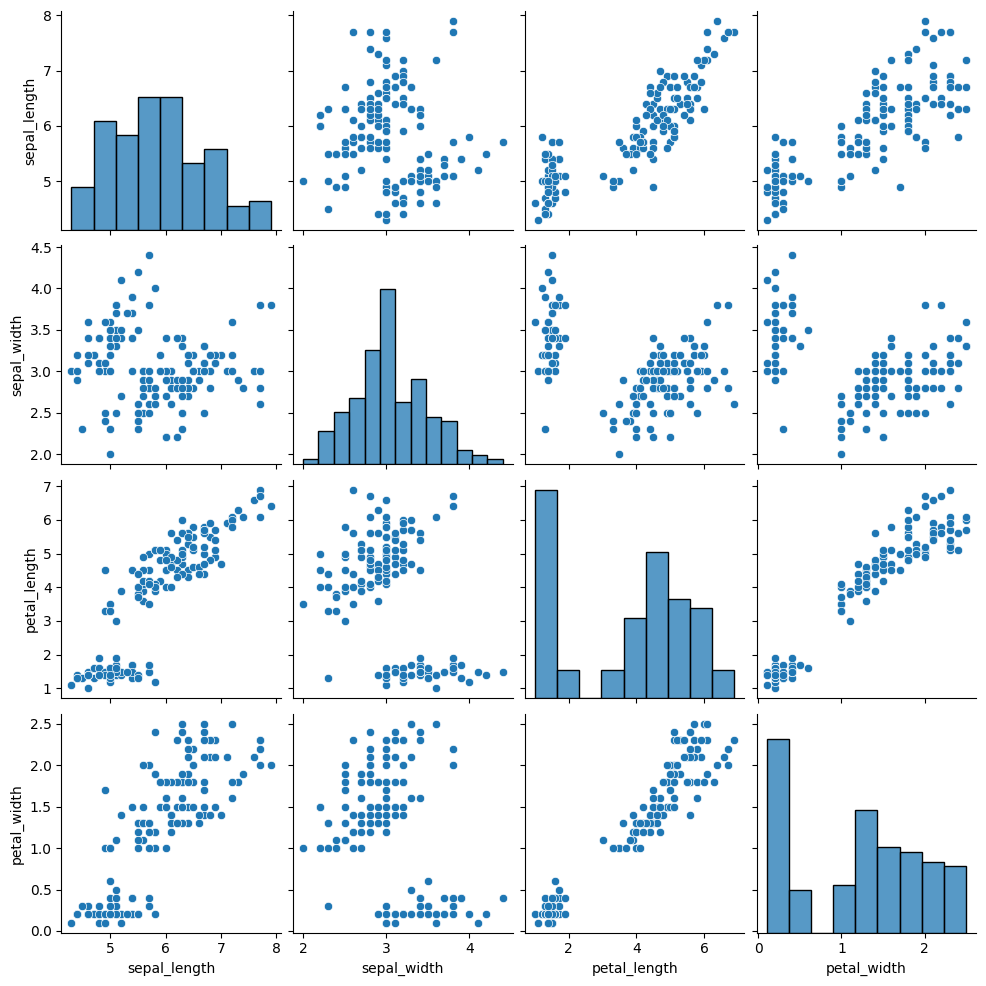

In [15]:
sns.pairplot(iris)

In [16]:
X=iris.drop('species',axis=1)
y=iris['species']

In [17]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



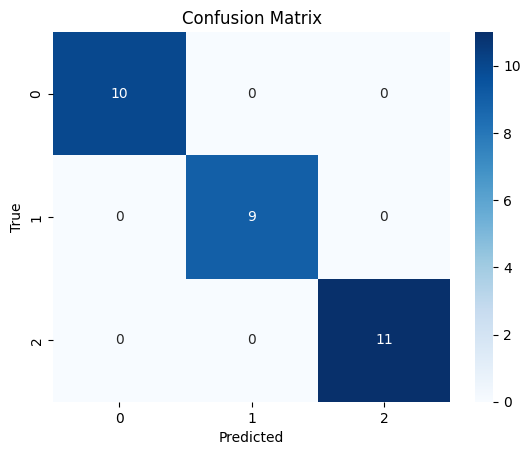

In [19]:
y_pred=clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#feature importance
feature_importance =pd.DataFrame({'Feature':X.columns,'Importance':clf.feature_importances_})
print("feature im;ortance:\n",feature_importance)

feature im;ortance:
         Feature  Importance
0  sepal_length    0.000000
1   sepal_width    0.016670
2  petal_length    0.906143
3   petal_width    0.077186


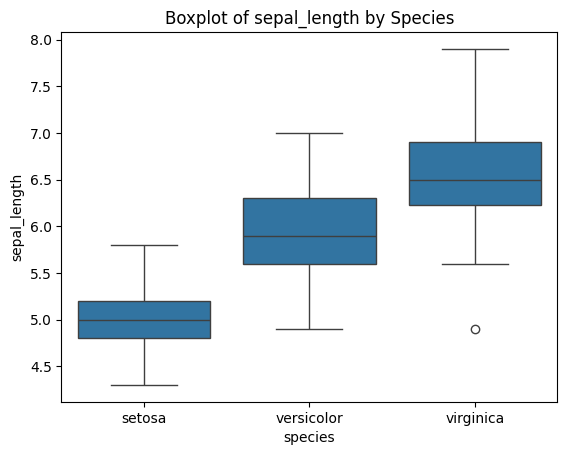

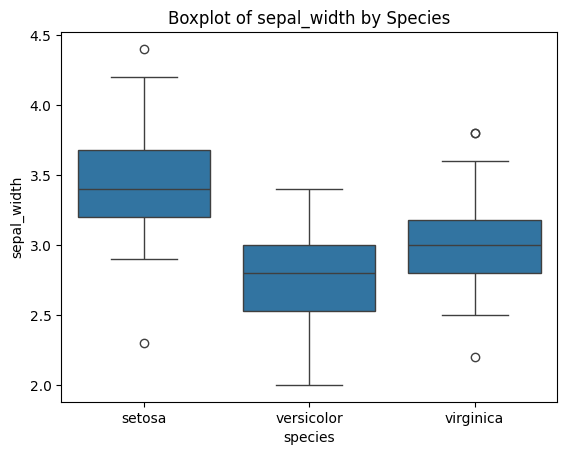

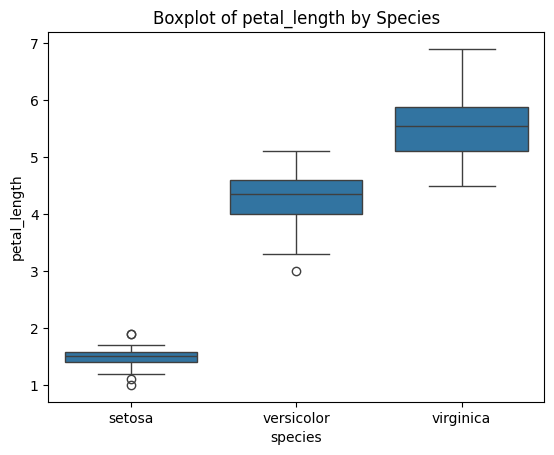

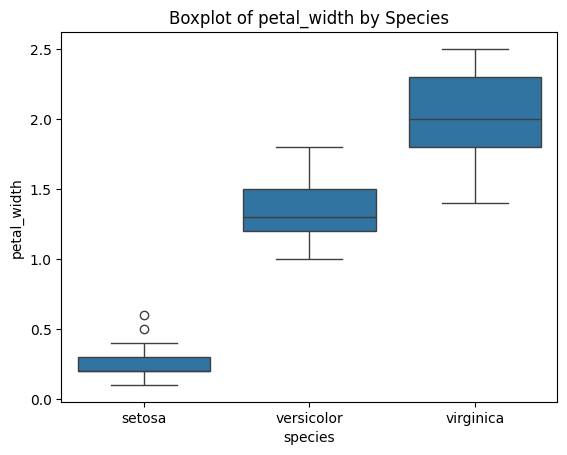

In [23]:
for feature in X.columns:
    sns.boxplot(x='species',y=feature,data=iris)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()